In [1]:
import pandas as pd

df = pd.read_csv('/home/jing/Desktop/Materials Project Data/MP_queried_data_featurized.csv')

df = df.dropna(subset=['formula_pretty'])

# Calculate the mean and standard deviation of the formation energy
formation_energy_mean = df['formation_energy_per_atom'].mean()
formation_energy_std = df['formation_energy_per_atom'].std()

# Define the upper and lower bounds
lower_bound = formation_energy_mean - 7 * formation_energy_std
upper_bound = formation_energy_mean + 7 * formation_energy_std

# Remove samples with formation energy outside of ±7σ 
train_data_filtered = df[(df['formation_energy_per_atom'] >= lower_bound) & (df['formation_energy_per_atom'] <= upper_bound)]

train_data_filtered.reset_index(drop=True, inplace=True)

/tmp/ipykernel_54391/2564697825.py:3: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/jing/Desktop/Materials Project Data/MP_queried_data_featurized.csv')


In [2]:
df_lowest_energy = train_data_filtered.sort_values('formation_energy_per_atom').drop_duplicates(subset=['formula_pretty', 'number'], keep='first')

df_featurized_sg = pd.get_dummies(df_lowest_energy , columns=['number'], prefix='s_g')

df_featurized_sg

,formula_pretty,crystal_system,symbol,point_group,symprec,version,uncorrected_energy_per_atom,energy_per_atom,formation_energy_per_atom,energy_above_hull,...,s_g_221,s_g_222,s_g_223,s_g_224,s_g_225,s_g_226,s_g_227,s_g_228,s_g_229,s_g_230
105769,BaGdCrFeO6,Cubic,F-43m,-43m,0.1,2.0.2,-10.696461,-11.534161,-5.150986,0.000000,...,0,0,0,0,0,0,0,0,0,0
90178,LaF3,Trigonal,P-3c1,-3m,0.1,2.0.2,-14.288985,-14.288985,-4.510049,0.000000,...,0,0,0,0,0,0,0,0,0,0
142487,LaF3,Hexagonal,P6_3cm,6mm,0.1,2.0.2,-14.288084,-14.288084,-4.509148,0.000901,...,0,0,0,0,0,0,0,0,0,0
60887,TbF3,Orthorhombic,Pnma,mmm,0.1,2.0.2,-14.653872,-14.653872,-4.504523,0.000000,...,0,0,0,0,0,0,0,0,0,0
47638,DyF3,Orthorhombic,Pnma,mmm,0.1,2.0.2,-14.839594,-14.839594,-4.501402,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21227,Ta,Orthorhombic,Cmmm,mmm,0.1,2.0.2,-6.712313,-43.446368,5.145465,5.145465,...,0,0,0,0,0,0,0,0,0,0
49985,Ta,Tetragonal,P4/mbm,4/mmm,0.1,2.0.2,-6.711395,-43.445450,5.146383,5.146383,...,0,0,0,0,0,0,0,0,0,0
3177,TaMoW2,Orthorhombic,Immm,mmm,0.1,2.0.2,-6.966115,-39.150404,5.199447,5.272300,...,0,0,0,0,0,0,0,0,0,0
148102,TaNbW2,Orthorhombic,Immm,mmm,0.1,2.0.2,-6.768987,-38.804449,5.210925,5.261849,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = df_featurized_sg[['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 
                     'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 
                     'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 
                     'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 
                     'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 
                     'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 
                     'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 
                     'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 
                     'Es', 'Fm', 'Md', 'No', 'Lr', 's_g_1', 's_g_2', 's_g_3', 's_g_4', 's_g_5', 
                     's_g_6', 's_g_7', 's_g_8', 's_g_9', 's_g_10', 's_g_11', 's_g_12', 's_g_13', 
                     's_g_14', 's_g_15', 's_g_16', 's_g_17', 's_g_18', 's_g_19', 's_g_20', 
                     's_g_21', 's_g_22', 's_g_23', 's_g_24', 's_g_25', 's_g_26', 's_g_27', 
                     's_g_28', 's_g_29', 's_g_30', 's_g_31', 's_g_32', 's_g_33', 's_g_34', 
                     's_g_35', 's_g_36', 's_g_37', 's_g_38', 's_g_39', 's_g_40', 's_g_41', 
                     's_g_42', 's_g_43', 's_g_44', 's_g_45', 's_g_46', 's_g_47', 's_g_48', 
                     's_g_49', 's_g_50', 's_g_51', 's_g_52', 's_g_53', 's_g_54', 's_g_55', 
                     's_g_56', 's_g_57', 's_g_58', 's_g_59', 's_g_60', 's_g_61', 's_g_62', 
                     's_g_63', 's_g_64', 's_g_65', 's_g_66', 's_g_67', 's_g_68', 's_g_69', 
                     's_g_70', 's_g_71', 's_g_72', 's_g_73', 's_g_74', 's_g_75', 's_g_76', 
                     's_g_77', 's_g_78', 's_g_79', 's_g_80', 's_g_81', 's_g_82', 's_g_83', 
                     's_g_84', 's_g_85', 's_g_86', 's_g_87', 's_g_88', 's_g_89', 's_g_90', 
                     's_g_91', 's_g_92', 's_g_94', 's_g_95', 's_g_96', 's_g_97', 's_g_98', 
                     's_g_99', 's_g_100', 's_g_101', 's_g_102', 's_g_103', 's_g_104', 's_g_105', 
                     's_g_106', 's_g_107', 's_g_108', 's_g_109', 's_g_110', 's_g_111', 's_g_112', 
                     's_g_113', 's_g_114', 's_g_115', 's_g_116', 's_g_117', 's_g_118', 's_g_119', 
                     's_g_120', 's_g_121', 's_g_122', 's_g_123', 's_g_124', 's_g_125', 's_g_126', 
                     's_g_127', 's_g_128', 's_g_129', 's_g_130', 's_g_131', 's_g_132', 's_g_133', 
                     's_g_134', 's_g_135', 's_g_136', 's_g_137', 's_g_138', 's_g_139', 's_g_140', 
                     's_g_141', 's_g_142', 's_g_143', 's_g_144', 's_g_145', 's_g_146', 's_g_147', 
                     's_g_148', 's_g_149', 's_g_150', 's_g_151', 's_g_152', 's_g_153', 's_g_154', 
                     's_g_155', 's_g_156', 's_g_157', 's_g_158', 's_g_159', 's_g_160', 's_g_161', 
                     's_g_162', 's_g_163', 's_g_164', 's_g_165', 's_g_166', 's_g_167', 's_g_169', 
                     's_g_171', 's_g_172', 's_g_173', 's_g_174', 's_g_175', 's_g_176', 's_g_177', 
                     's_g_178', 's_g_180', 's_g_181', 's_g_182', 's_g_183', 's_g_184', 's_g_185', 
                     's_g_186', 's_g_187', 's_g_188', 's_g_189', 's_g_190', 's_g_191', 's_g_192', 
                     's_g_193', 's_g_194', 's_g_195', 's_g_196', 's_g_197', 's_g_198', 's_g_199', 
                     's_g_200', 's_g_201', 's_g_202', 's_g_203', 's_g_204', 's_g_205', 's_g_206', 
                     's_g_208', 's_g_209', 's_g_210', 's_g_212', 's_g_213', 's_g_214', 's_g_215', 
                     's_g_216', 's_g_217', 's_g_218', 's_g_219', 's_g_220', 's_g_221', 's_g_222', 
                     's_g_223', 's_g_224', 's_g_225', 's_g_226', 's_g_227', 's_g_228', 's_g_229', 's_g_230', 'formation_energy_per_atom']].values

y = df_featurized_sg['energy_above_hull'].values

Using device: cuda
Epoch [1/500], Train Loss: 0.0869, Test Loss: 0.0730
Epoch [2/500], Train Loss: 0.0681, Test Loss: 0.0703
Epoch [3/500], Train Loss: 0.0607, Test Loss: 0.0562
Epoch [4/500], Train Loss: 0.0576, Test Loss: 0.0548
Epoch [5/500], Train Loss: 0.0522, Test Loss: 0.0534
Epoch [6/500], Train Loss: 0.0487, Test Loss: 0.0472
Epoch [7/500], Train Loss: 0.0475, Test Loss: 0.0451
Epoch [8/500], Train Loss: 0.0441, Test Loss: 0.0447
Epoch [9/500], Train Loss: 0.0431, Test Loss: 0.0420
Epoch [10/500], Train Loss: 0.0419, Test Loss: 0.0417
Epoch [11/500], Train Loss: 0.0410, Test Loss: 0.0412
Epoch [12/500], Train Loss: 0.0401, Test Loss: 0.0401
Epoch [13/500], Train Loss: 0.0382, Test Loss: 0.0403
Epoch [14/500], Train Loss: 0.0375, Test Loss: 0.0381
Epoch [15/500], Train Loss: 0.0379, Test Loss: 0.0383
Epoch [16/500], Train Loss: 0.0469, Test Loss: 0.0508
Epoch [17/500], Train Loss: 0.0385, Test Loss: 0.0391
Epoch [18/500], Train Loss: 0.0361, Test Loss: 0.0365
Epoch [19/500], Tr

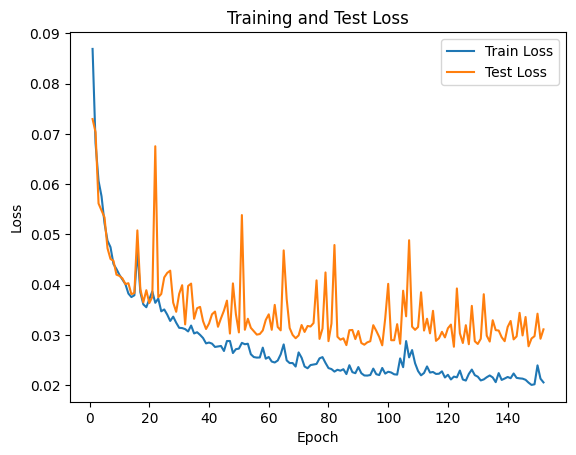

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Device initialization
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Normalize the data
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

# Define model parameters
input_size = X_train.shape[1]
output_size = 1

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 64)
        self.fc6 = nn.Linear(64, 32)
        self.fc7 = nn.Linear(32, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = torch.relu(self.fc6(x))
        x = self.fc7(x)
        return x

# Create dataset and dataloaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

# Create an instance of the model and move it to device
model = NeuralNetwork(input_size, output_size).to(device)

# Define the loss function and optimizer
criterion = nn.L1Loss()  # Mean Absolute Error loss
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Lists to store training and testing loss
train_losses = []
test_losses = []

# Train the model with early stopping
num_epochs = 500
patience = 30  # Number of epochs to wait for improvement
best_test_loss = float('inf')
counter = 0  # Counter for patience

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    train_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.view(-1, 1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    
    # Calculate average train loss
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # Evaluate the model on the test set
    model.eval()  # Set model to evaluation mode
    test_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets.view(-1, 1))
            test_loss += loss.item() * inputs.size(0)

    # Calculate average test loss
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    
    # Check for early stopping
    if test_loss < best_test_loss:
        best_test_loss = test_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f'Early stopping at epoch {epoch+1}')
            break
    
    # Print progress for every epoch
    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

# Plot the loss
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(test_losses) + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()


/home/jing/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Absolute Error (MAE): 0.0311
Mean Squared Error (MSE): 0.0046
Root Mean Squared Error (RMSE): 0.0679
R-squared (R2): 0.9722


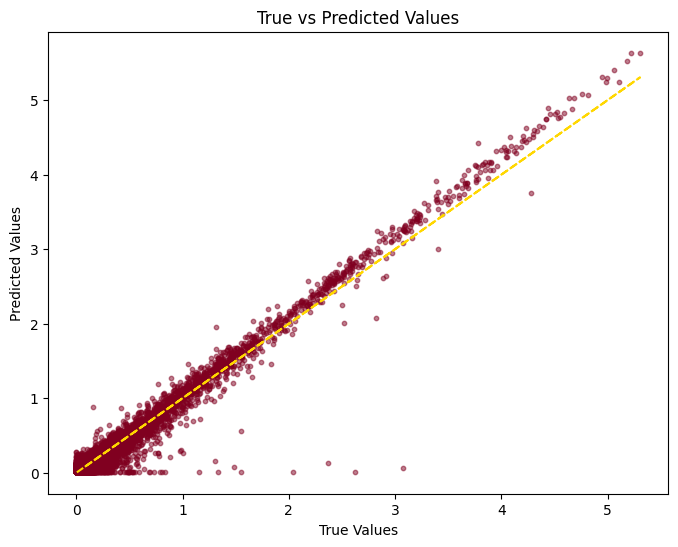

In [8]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Make predictions on the test data
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    y_pred = model(X_test.to(device)).cpu().numpy()

# Calculate evaluation metrics
mae = mean_absolute_error(y_test.cpu().numpy(), y_pred)
mse = mean_squared_error(y_test.cpu().numpy(), y_pred)
rmse = mean_squared_error(y_test.cpu().numpy(), y_pred, squared=False)
r2 = r2_score(y_test.cpu().numpy(), y_pred)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-squared (R2): {r2:.4f}')

X_test = X_test.to(device)

# Get predictions for the test set
with torch.no_grad():
    y_pred = model(X_test).cpu().numpy()

# Convert tensors back to NumPy arrays
y_true = y_test.cpu().numpy()

# Plot true vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, color='#800020', alpha=0.5, s=10)  # Burgundy dots
plt.plot(y_true, y_true, color='#FFD700', linestyle='--')  # Plot y = x line for reference in gold
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(False)
#plt.savefig('true_vs_predicted_values_sg.pdf')
plt.show()

In [9]:
torch.save(model.state_dict(), 'trained_model_covex_hull.pth')

In [10]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import matplotlib.pyplot as plt

# Device initialization
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Define model architecture (same as used during training)
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 64)
        self.fc6 = nn.Linear(64, 32)
        self.fc7 = nn.Linear(32, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = torch.relu(self.fc6(x))
        x = self.fc7(x)
        return x

# Create an instance of the model and move it to the device
model = NeuralNetwork(input_size=X_test.shape[1], output_size=1).to(device)

# Load the model state dictionary
model.load_state_dict(torch.load('trained_model_covex_hull.pth'))

# Set the model to evaluation mode
model.eval()

# Normalize the test data independently
X_test = (X_test - X_test.mean()) / X_test.std()

# Create the test dataset and DataLoader
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the loss function
criterion = nn.L1Loss()  # Mean Absolute Error loss

# Lists to store predictions and true values
predicted_values = []
true_values = []

# Evaluate the model
test_loss = 0.0
with torch.no_grad():  # No need to calculate gradients for evaluation
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, targets.view(-1, 1))
        test_loss += loss.item() * inputs.size(0)

        # Store predictions and true values
        predicted_values.extend(outputs.squeeze().cpu().numpy())
        true_values.extend(targets.squeeze().cpu().numpy())

# Calculate average test loss
test_loss /= len(test_loader.dataset)
print(f'Test Loss: {test_loss:.4f}')

# Create a DataFrame with the true and predicted values
df = pd.DataFrame({
    'True Values e_hull': true_values,
    'Predicted Values e_hull': predicted_values
})

df

Using device: cuda
Test Loss: 0.0311


,True Values e_hull,Predicted Values e_hull
0,0.080005,0.007018
1,0.171504,0.180320
2,0.000000,0.007018
3,0.174435,0.007018
4,0.318168,0.076663
...,...,...
26647,0.003438,0.057999
26648,0.108829,0.122840
26649,1.101710,1.268536
26650,0.009732,0.009660


In [11]:
df.to_csv('predvstrue_e_hull.csv', index=False)

In [1]:
import pandas as pd

df = pd.read_csv('predvstrue_e_hull.csv')

df

,True Values e_hull,Predicted Values e_hull
0,0.080005,0.007018
1,0.171504,0.180320
2,0.000000,0.007018
3,0.174435,0.007018
4,0.318168,0.076663
...,...,...
26647,0.003438,0.057999
26648,0.108829,0.122840
26649,1.101710,1.268536
26650,0.009732,0.009660


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


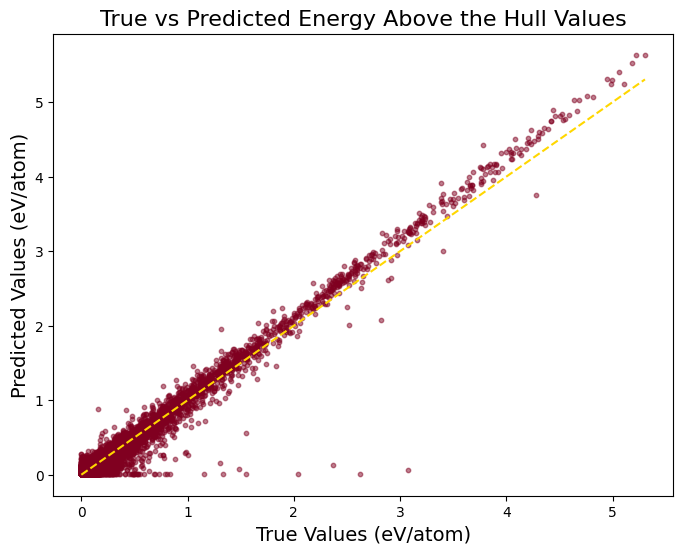

In [2]:
import matplotlib.pyplot as plt

y_true = df['True Values e_hull']
y_pred = df['Predicted Values e_hull']

# Plot true vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, color='#800020', alpha=0.5, s=10)  # Burgundy dots
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='#FFD700', linestyle='--')  # y = x line in gold

# Set title and labels with specified font sizes
plt.title('True vs Predicted Energy Above the Hull Values', fontsize=16)  # Title font size
plt.xlabel('True Values (eV/atom)', fontsize=14)  # X label font size
plt.ylabel('Predicted Values (eV/atom)', fontsize=14)  # Y label font size

plt.grid(False)
plt.savefig("ehull.eps", format='eps')

# Display the plot
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


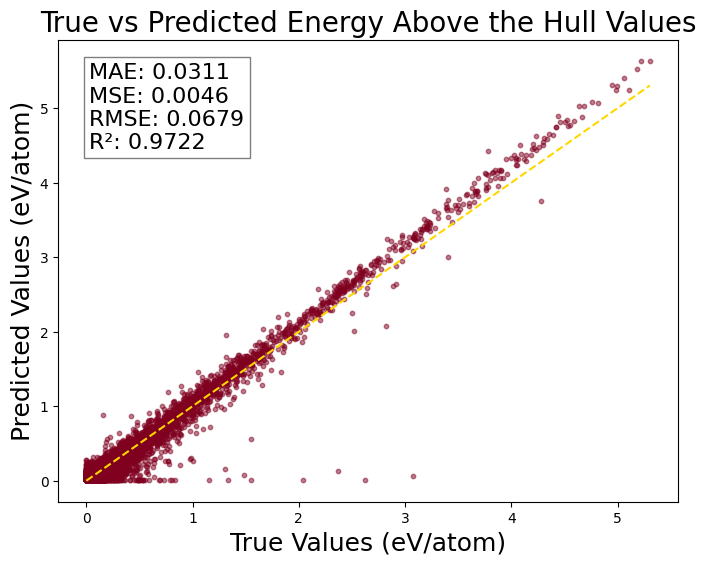

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_true = df['True Values e_hull']
y_pred = df['Predicted Values e_hull']

# Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

# Plot true vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, color='#800020', alpha=0.5, s=10)  # Burgundy dots
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='#FFD700', linestyle='--')  # y = x line in gold

# Set title and labels with specified font sizes
plt.title('True vs Predicted Energy Above the Hull Values', fontsize=20)  # Title font size
plt.xlabel('True Values (eV/atom)', fontsize=18)  # X label font size
plt.ylabel('Predicted Values (eV/atom)', fontsize=18)  # Y label font size

# Create a box for metrics in the upper-left corner
metrics_text = f'MAE: {mae:.4f}\nMSE: {mse:.4f}\nRMSE: {rmse:.4f}\nR²: {r2:.4f}'
plt.text(0.05, 0.95, metrics_text, transform=plt.gca().transAxes,
         fontsize=16, verticalalignment='top',
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

plt.grid(False)
plt.savefig("pred_v_true_ehull.eps", format='eps')

# Display the plot
plt.show()
